1. Import openAI dependences (load with conda install openai)

In [32]:
#Import openAI dependences (module)
import openai
import requests
import os
from io import BytesIO
from PIL import Image
import uuid

2. Use the API Key from openAI page

In [33]:
#Add our API Key copied from openAI page
openai.api_key = ""

3. Make a request

In [34]:
#Make the context of our prompt envoirement
context = 'Eres especialista en la generación de prompts. A partir de los datos ingresados por el usuario, genera un prompt detallado y especifico para la planeación de una campaña de marketing digital.'

#prompt (text/user's question)
actividadEconomica = input("¿Cual es la actividad económica de la empresa?")
publicoObjetivo = input("¿A quienes va dirigida esta campaña?")
contenido = input("¿Que tipo de contenido deseas usar?")
canales = input("¿En que plataformas deseas distribuir el contenido de esta campaña?")

prompt = f"Crea una campaña de marketing digital para un negocio de {actividadEconomica}, dirigida a {publicoObjetivo}, donde el tipo de contenido será: {contenido}, y se distribuira en {canales}"

¿Cual es la actividad económica de la empresa? Venta de bicicletas
¿A quienes va dirigida esta campaña? deportistas
¿Que tipo de contenido deseas usar? imagenes
¿En que plataformas deseas distribuir el contenido de esta campaña? instagram


In [35]:
# Make the request
conversation = [
    {"role":"system", "content": context},
    {"role":"user", "content": prompt}
]
    
response = openai.ChatCompletion.create(
    model="gpt-4o-mini",
    messages = conversation,
    max_tokens=1000
)
    
message = response.choices[0]['message']
    
#Storage the response in a variable to use it
primer_conversasion = response['choices'][0]['message']['content'].strip()
    
#Use the varible
print(primer_conversasion)

**Prompt para la Planeación de una Campaña de Marketing Digital para un Negocio de Venta de Bicicletas Dirigida a Deportistas en Instagram:**

**Objetivo de la Campaña:**
Incrementar la visibilidad de la marca y las ventas de bicicletas entre la comunidad de deportistas, especialmente ciclistas aficionados y profesionales, a través de contenido visual atractivo en Instagram.

**Público Objetivo:**
- Ciclistas de todas las edades (18-45 años)
- Deportistas que buscan mejorar su rendimiento
- Personas interesadas en el ciclismo recreativo, competitivo y de aventura
- Ubicación geográfica: [especificar la región o país si es necesario]

**Tipo de Contenido:**
1. **Imágenes de Alta Calidad:**
   - Fotografías vibrantes y dinámicas de las bicicletas en acción (por ejemplo, rutas escénicas, ciclismo de montaña, carreras, etc.)
   - Primeros planos de detalles de las bicicletas (componentes, diseño, tecnología)
   - Imágenes de ciclistas usando las bicicletas, mostrando emociones como diversi

4. Settings

Creación de imagénes apartir de las especificaciones del usuario

In [36]:
#Make the context of our prompt envoirement
context = f'basado en {prompt}, crea un prompt para la generación de un banner'

entrada = input("¿Deseas comenzar creando una imagen para esta campaña? (si/no)")
if entrada.lower() == "si":
        
    #prompt (text/user's question)
    estilo = input("¿Tipo de imagen? (minimalista, hiperrealista, animación, moderno, etc.)")
    colores = input("¿Elige un máximo de tres colores para tu banner?")
    mensaje = input("¿Que te gustaria que transmitiera? (lujo, confianza, sostenibilidad, etc.)")
        
    #print(prompt)
    prompt = f"Con base en este contexto: {context}, genera una imagen que no contenga texto y pero que contenga las siguientes caracteristicas - {estilo}. - {colores}. - {mensaje}."
else:
    print("Espero la planeación te sea de ayuda. ")

¿Deseas comenzar creando una imagen para esta campaña? (si/no) si
¿Tipo de imagen? (minimalista, hiperrealista, animación, moderno, etc.) Hiperrealista
¿Elige un máximo de tres colores para tu banner? Azul, negro y rojo
¿Que te gustaria que transmitiera? (lujo, confianza, sostenibilidad, etc.) dinamismo


La imagen ha sido descargada y almacenada correctamente en: ./generated_images/8efef62b-733d-4f19-8f2f-3f487459c09c.png
Prompt utilizado: Con base en este contexto: basado en Crea una campaña de marketing digital para un negocio de Venta de bicicletas, dirigida a deportistas, donde el tipo de contenido será: imagenes, y se distribuira en instagram, crea un prompt para la generación de un banner, genera una imagen que no contenga texto y pero que contenga las siguientes caracteristicas - Hiperrealista. - Azul, negro y rojo. - dinamismo.


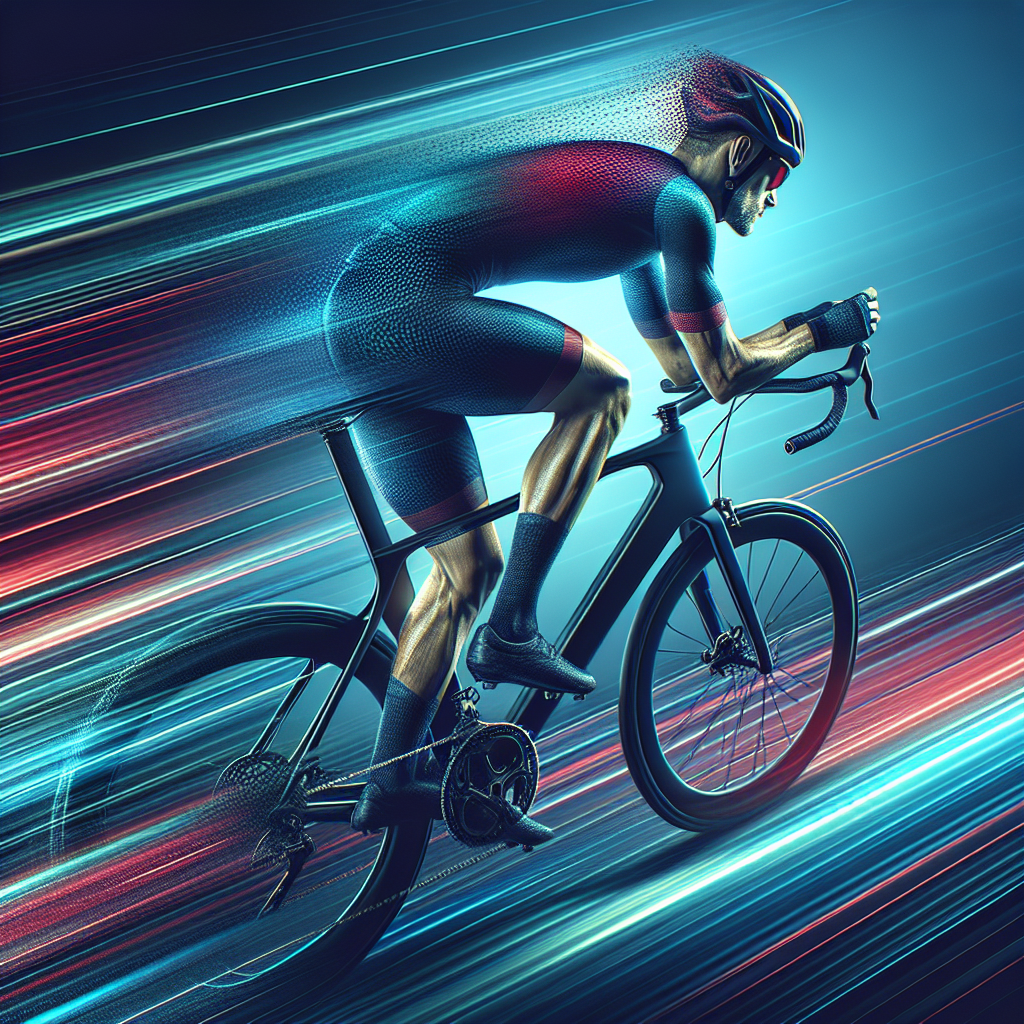

In [37]:
# Make the request for the image prompt
image_response = openai.Image.create(
    model='dall-e-3',
    quality="standard",
    prompt=prompt,
    n=1,
    size="1024x1024"
)

# Get and print the generated image URL
# print(image_response['data'][0]['url'])

# Download the image
response = requests.get(image_response['data'][0]['url'])

# Verify if possible to download
if response.status_code == 200:
    # Get filename
    filename = str(uuid.uuid4()) + ".png"
    
    # Directory to save the image
    directory = "./generated_images/"
    
    # Make directory if not exists
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Complete path
    filepath = os.path.join(directory, filename)
    
    # Save the image
    with open(filepath, 'wb') as f:
        f.write(response.content)
        
    print("La imagen ha sido descargada y almacenada correctamente en:", filepath)
    img = Image.open(filepath)
    print(f"Prompt utilizado: {prompt}")
    display(img)

else:
    print("Hubo un error al descargar la imagen.")